In [156]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [158]:
df = df.drop(["PassengerId", "Name", "Pclass", "Ticket", "Cabin"], axis = 1)
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,34.5,0,0,7.8292,Q
1,1,female,47.0,1,0,7.0000,S
2,0,male,62.0,0,0,9.6875,Q
3,0,male,27.0,0,0,8.6625,S
4,1,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,0,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,0,male,38.5,0,0,7.2500,S
416,0,male,NaN,0,0,8.0500,S


In [159]:
labelEncoder = LabelEncoder()

labels = ["Sex", "Embarked"]
for label in labels:
    df[label] = labelEncoder.fit_transform(df[label])

df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,34.5,0,0,7.8292,1
1,1,0,47.0,1,0,7.0000,2
2,0,1,62.0,0,0,9.6875,1
3,0,1,27.0,0,0,8.6625,2
4,1,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,0,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,0,1,38.5,0,0,7.2500,2
416,0,1,NaN,0,0,8.0500,2


In [160]:
df = df.fillna(df.median())
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,34.5,0,0,7.8292,1
1,1,0,47.0,1,0,7.0000,2
2,0,1,62.0,0,0,9.6875,1
3,0,1,27.0,0,0,8.6625,2
4,1,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,0,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,0,1,38.5,0,0,7.2500,2
416,0,1,27.0,0,0,8.0500,2


In [161]:
x = df.drop("Survived", axis = 1)
x

,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,34.5,0,0,7.8292,1
1,0,47.0,1,0,7.0000,2
2,1,62.0,0,0,9.6875,1
3,1,27.0,0,0,8.6625,2
4,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...
413,1,27.0,0,0,8.0500,2
414,0,39.0,0,0,108.9000,0
415,1,38.5,0,0,7.2500,2
416,1,27.0,0,0,8.0500,2


In [162]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.75592895,  0.38623105, -0.49947002, -0.4002477 , -0.49741333,
        -0.47091535],
       [-1.32287566,  1.37137004,  0.61699237, -0.4002477 , -0.51227801,
         0.70076689],
       [ 0.75592895,  2.55353683, -0.49947002, -0.4002477 , -0.46410047,
        -0.47091535],
       ...,
       [ 0.75592895,  0.70147553, -0.49947002, -0.4002477 , -0.50779638,
         0.70076689],
       [ 0.75592895, -0.20485235, -0.49947002, -0.4002477 , -0.49345515,
         0.70076689],
       [ 0.75592895, -0.20485235,  0.61699237,  0.61989583, -0.23695704,
        -1.64259759]])

In [163]:
y = df["Survived"]
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [165]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [166]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Text(58.222222222222214, 0.5, 'Predicted')

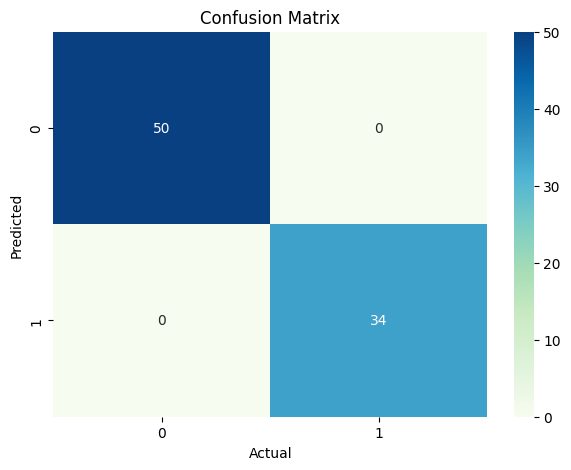

In [167]:
confusionMatrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (7, 5))
sns.heatmap(confusionMatrix, annot = True, fmt = "d", cmap = "GnBu")
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")